<a href="https://colab.research.google.com/github/kdahun/bigdata2023/blob/main/CNN_(1)_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Dataset을 CNN으로 훈련

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

## 1. 데이터 다운로드 및 적재

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [ ]:
train_images[0].shape

(28, 28)

## 2. 데이터 시각화

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

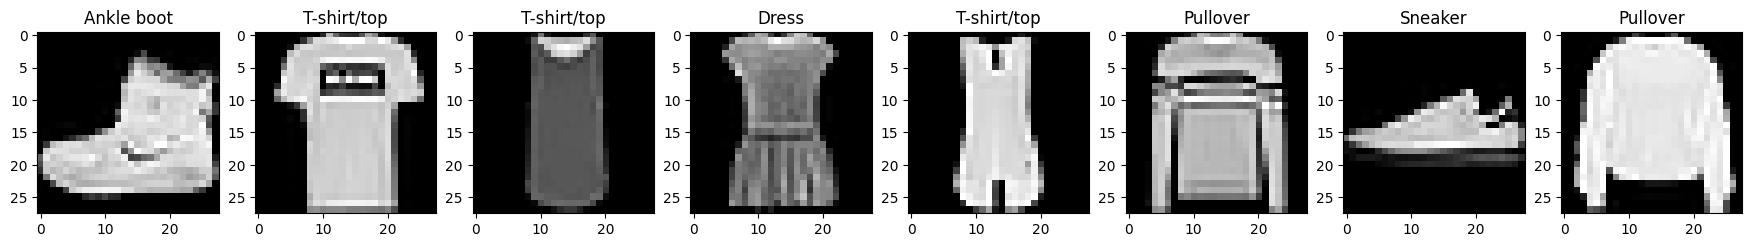

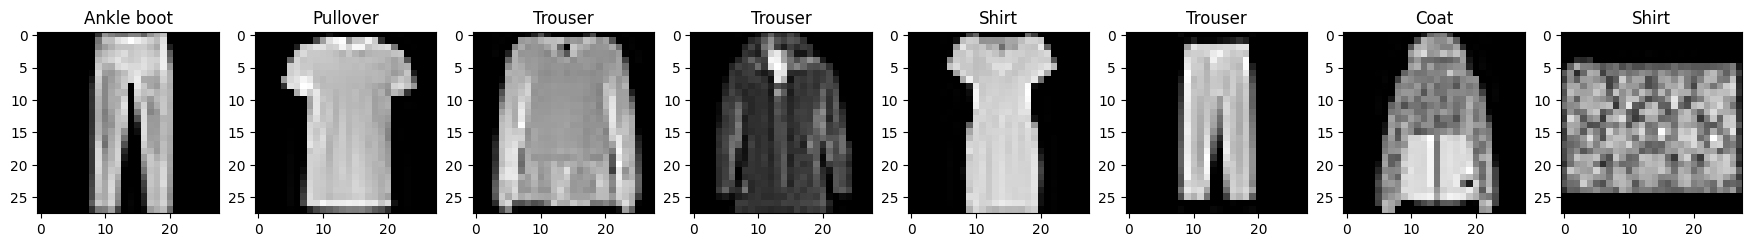

In [ ]:
figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=8)

for i in range(8):
    axes[i].imshow(train_images[i], cmap="gray")
    axes[i].set_title(class_names[train_labels[i]])
plt.show()

figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=8)
for i in range(8):
    axes[i].imshow(train_images[i+16], cmap="gray")
    axes[i].set_title(class_names[test_labels[i]])
plt.show()

## 3. 데이터 전처리

In [ ]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)

test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

## 4. 모델 생성, 학습, 검증

**(참고)** Keras에서 Mdoel 만들기

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Sequential API
model = Sequential([Flatten(input_shape=(28, 28)),
                    Dense(units=20, activation="sigmoid"),
                    Dense(units=10, activation="softmax")])

In [ ]:
# Functional API
input_tensor = Input(shape=(28, 28))
x = Flatten()(input_tensor)
x = Dense(units=20, activation="sigmoid")(x)
output = Dense(units=10, activaton="softmax")(x)

model = Model(inputs=input_tensor, outputs=output)

**(참고) Conv2D 적용, Pooling 적용**

In [ ]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=4, kernel_size=3, strides=(1, 1),
           padding="same", activation="relu")(input_tensor)
x = MaxPooling2D(pool_size =(2, 2), strides=(2, 2))(x)

In [ ]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=16, kernel_size=3, strides=(1, 1),
           padding="same", activation="relu")(input_tensor)
x = MaxPooling2D(pool_size =(2, 2), strides=(2, 2))(x)   # 14*14*16

x = Conv2D(filters=32, kernel_size=3, strides=(1, 1),
           padding="same", activation="relu")(x)
x = MaxPooling2D(pool_size =(2, 2), strides=(2, 2))(x)   # 7*7*32

x = Flatten()(x) # 7*7*32=1568
x = Dense(units=200, activation="relu")(x)
output = Dense(units=10, activation="softmax")(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0     

In [ ]:
7*7*32

1568